### Task 1: Non Linear Dataset

#### Importing libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#### Loading datasets

In [ ]:
# Read the dataset while skipping the first line (meta-information)
df = pd.read_csv("../Datasets/NonLinearDataset/NonLinearDataset.txt", sep=" ", header=None, skiprows=1)
df = df.iloc[:, :2]  # Select only the first two columns (features)

# Convert all values to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

#### Dividing training and testing data

In [ ]:
# Assign class labels based on the dataset structure
df['class'] = np.concatenate([np.zeros(500), np.ones(500), np.full(1000, 2)])

# Split the data into features (X) and labels (y)
X = df.iloc[:, :2].values  # First two columns as features
y = df['class'].values    # 'class' column as the target labels

# Cast y to integer type to ensure correct processing
y = y.astype(int)

# Split into train and test data (70% training, 30% testing) using stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Now we have the training and testing data, with three classes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Class Distribution in Training Data:", np.bincount(y_train))
print("Class Distribution in Testing Data:", np.bincount(y_test))

# Apply Polynomial Features to transform the input data (degree=3 for this case)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### SVM-based classifier using (a) linear kernel, (b) polynomial kernel and (c) Gaussian/RBF kernel

In [ ]:
# Combine the training and test data
X_train = pd.concat([df1_train, df2_train], axis=0).values
y_train = np.array([0] * len(df1_train) + [1] * len(df2_train))  # Labels for class 0 and class 1
X_test = pd.concat([df1_test, df2_test], axis=0).values
y_test = np.array([0] * len(df1_test) + [1] * len(df2_test))  # Labels for class 0 and class 1

# Scale the data (important for SVM with RBF and polynomial kernels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y, title):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average=None, zero_division=0)
    recall = recall_score(y, y_pred, average=None, zero_division=0)
    f1 = f1_score(y, y_pred, average=None, zero_division=0)
    cm = confusion_matrix(y, y_pred)

    print(f"{title}")
    print("Accuracy:", accuracy)
    print("Precision per class:", precision)
    print("Recall per class:", recall)
    print("F1 Score per class:", f1)
    print("Confusion Matrix:\n", cm)

    # Plot decision boundary
    plot_decision_boundary(X, y, model, title=f"{title} - Decision Boundary")

# Experiment with different SVM configurations
kernels = ['linear', 'poly', 'rbf']  # Different kernel types
C_values = [0.1, 1, 10]  # Different C values for SVM
degree_values = [2, 3, 4]  # Degree for polynomial kernel
gamma_values = ['scale', 'auto']  # Gamma for RBF kernel

for kernel in kernels:
    for C in C_values:
        if kernel == 'poly':
            for degree in degree_values:
                model = SVC(kernel=kernel, C=C, degree=degree)
                model.fit(X_train_scaled, y_train)
                evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}, degree={degree}")

        elif kernel == 'rbf':
            for gamma in gamma_values:
                model = SVC(kernel=kernel, C=C, gamma=gamma)
                model.fit(X_train_scaled, y_train)
                evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}, gamma={gamma}")

        else:  # For 'linear' kernel
            model = SVC(kernel=kernel, C=C)
            model.fit(X_train_scaled, y_train)
            evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}")

Class Distribution in Training Data: [350 350 700]
Class Distribution in Testing Data: [150 150 300]
Fitting model with linear kernel, C=1
SVM with linear kernel, C=1
Accuracy: 0.5
Precision per class: [0.  0.  0.5]
Recall per class: [0. 0. 1.]
F1 Score per class: [0.         0.         0.66666667]
Confusion Matrix:
 [[  0   0 150]
 [  0   0 150]
 [  0   0 300]]


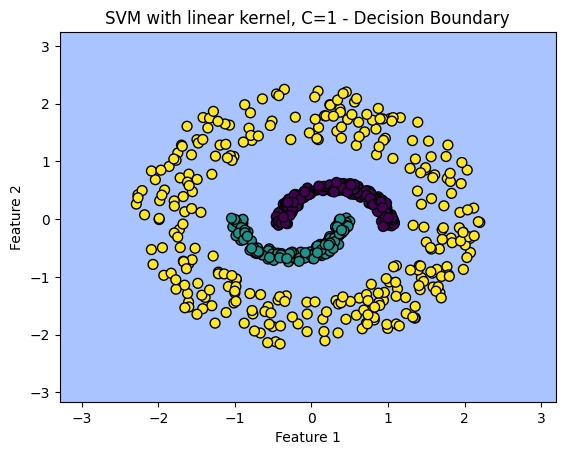

Fitting model with linear kernel, C=10
SVM with linear kernel, C=10
Accuracy: 0.5
Precision per class: [0.  0.  0.5]
Recall per class: [0. 0. 1.]
F1 Score per class: [0.         0.         0.66666667]
Confusion Matrix:
 [[  0   0 150]
 [  0   0 150]
 [  0   0 300]]


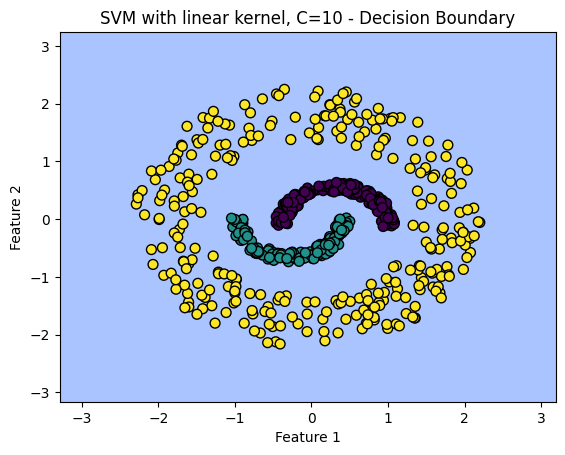

Fitting model with poly kernel, C=1, degree=3
SVM with poly kernel, C=1, degree=3
Accuracy: 0.5
Precision per class: [0.  0.  0.5]
Recall per class: [0. 0. 1.]
F1 Score per class: [0.         0.         0.66666667]
Confusion Matrix:
 [[  0   0 150]
 [  0   0 150]
 [  0   0 300]]


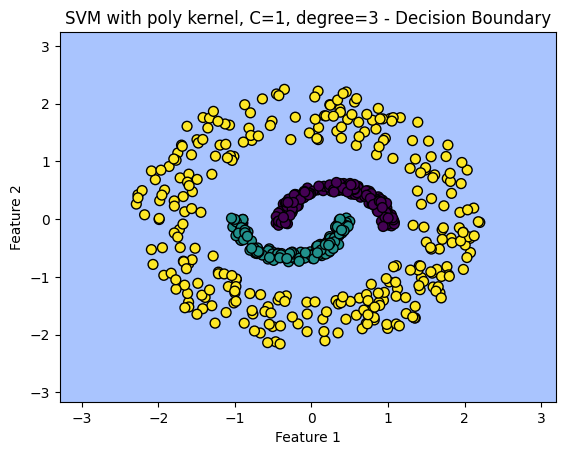

Fitting model with poly kernel, C=10, degree=3
SVM with poly kernel, C=10, degree=3
Accuracy: 0.5
Precision per class: [0.  0.  0.5]
Recall per class: [0. 0. 1.]
F1 Score per class: [0.         0.         0.66666667]
Confusion Matrix:
 [[  0   0 150]
 [  0   0 150]
 [  0   0 300]]


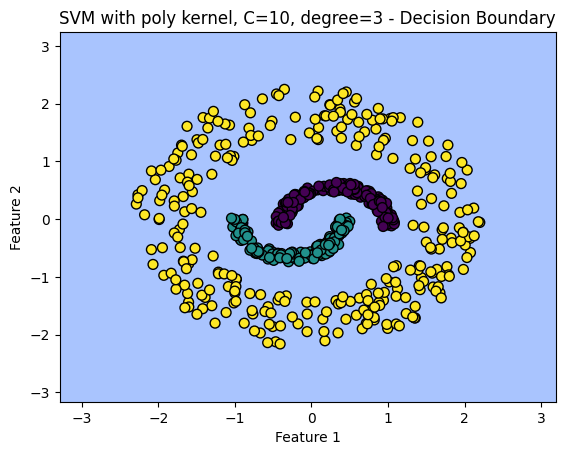

Fitting model with rbf kernel, C=1, gamma=scale
SVM with rbf kernel, C=1, gamma=scale
Accuracy: 0.9983333333333333
Precision per class: [1.         0.99337748 1.        ]
Recall per class: [0.99333333 1.         1.        ]
F1 Score per class: [0.99665552 0.99667774 1.        ]
Confusion Matrix:
 [[149   1   0]
 [  0 150   0]
 [  0   0 300]]


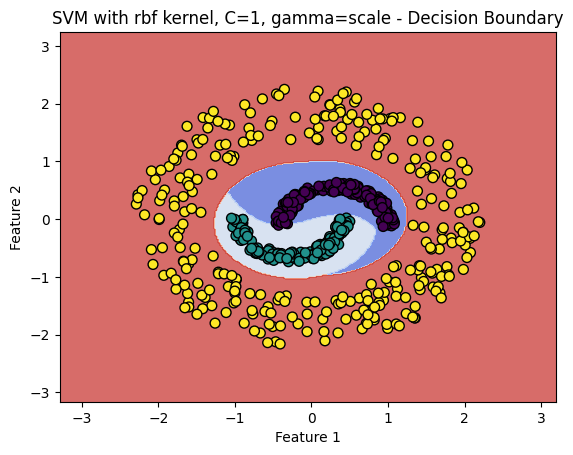

Fitting model with rbf kernel, C=10, gamma=scale
SVM with rbf kernel, C=10, gamma=scale
Accuracy: 1.0
Precision per class: [1. 1. 1.]
Recall per class: [1. 1. 1.]
F1 Score per class: [1. 1. 1.]
Confusion Matrix:
 [[150   0   0]
 [  0 150   0]
 [  0   0 300]]


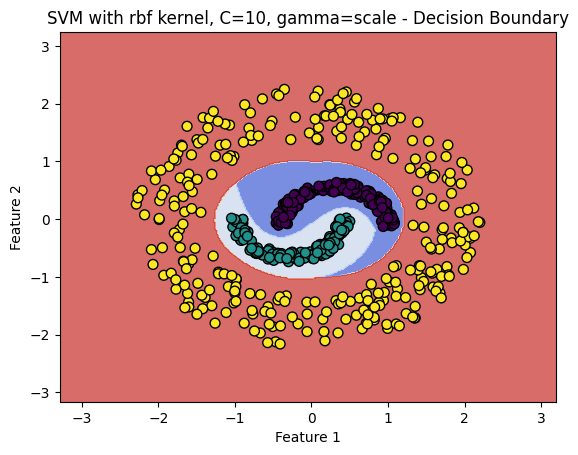

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Read the dataset while skipping the first line (meta-information)
df = pd.read_csv("../Datasets/NonLinearDataset/NonLinearDataset.txt", sep=" ", header=None, skiprows=1)
df = df.iloc[:, :2]  # Select only the first two columns (features)

# Convert all values to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Assign class labels based on the dataset structure
df['class'] = np.concatenate([np.zeros(500), np.ones(500), np.full(1000, 2)])

# Split the data into features (X) and labels (y)
X = df.iloc[:, :2].values  # First two columns as features
y = df['class'].values    # 'class' column as the target labels

# Cast y to integer type to ensure correct processing
y = y.astype(int)

# Perform stratified split to ensure class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Debugging: print the class distribution in the training and testing sets
print("Class Distribution in Training Data:", np.bincount(y_train))
print("Class Distribution in Testing Data:", np.bincount(y_test))

# Standardize (scale) the data (important for models like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    # Create a meshgrid that spans the entire feature space
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict on the entire grid
    Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid

    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)  # Filled contour plot
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y, title):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average=None, zero_division=0)
    recall = recall_score(y, y_pred, average=None, zero_division=0)
    f1 = f1_score(y, y_pred, average=None, zero_division=0)
    cm = confusion_matrix(y, y_pred)

    print(f"{title}")
    print("Accuracy:", accuracy)
    print("Precision per class:", precision)
    print("Recall per class:", recall)
    print("F1 Score per class:", f1)
    print("Confusion Matrix:\n", cm)

    # Plot decision boundary using the transformed features
    plot_decision_boundary(X, y, model, title=f"{title} - Decision Boundary")

# Experiment with different SVM configurations
kernels = ['linear', 'poly', 'rbf']  # Different kernel types
C_values = [1, 10]  # Try values of C more likely to work for this dataset
degree_values = [3]  # Set degree to 3 (common for polynomial kernels)
gamma_values = ['scale']  # 'scale' often works better for RBF

for kernel in kernels:
    for C in C_values:
        if kernel == 'poly':
            # Experimenting with polynomial kernel with different degrees
            for degree in degree_values:
                model = SVC(kernel=kernel, C=C, degree=degree)
                model.fit(X_train_scaled, y_train)
                print(f"Fitting model with {kernel} kernel, C={C}, degree={degree}")
                evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}, degree={degree}")

        elif kernel == 'rbf':
            # Experimenting with RBF kernel with different gamma values
            for gamma in gamma_values:
                model = SVC(kernel=kernel, C=C, gamma=gamma)
                model.fit(X_train_scaled, y_train)
                print(f"Fitting model with {kernel} kernel, C={C}, gamma={gamma}")
                evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}, gamma={gamma}")

        else:  # For 'linear' kernel
            model = SVC(kernel=kernel, C=C)
            model.fit(X_train_scaled, y_train)
            print(f"Fitting model with {kernel} kernel, C={C}")
            evaluate_model(model, X_test_scaled, y_test, f"SVM with {kernel} kernel, C={C}")
